In [1]:
## Analise Exploratoria

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinal.csv'
df_final = pd.read_csv(path_final, sep=';', encoding='utf-8')
df_final.head(1)

,RowId,Id_do_imovel,Url_da_Pagina_do_imovel,Url_do_Imovel,Nome_do_imovel,Preco,Tipo_de_Imovel,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,...,Percentual_Crimes,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distância_dirigindo_de_Lisboa_Portugal,Distância_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional
0,0,30365582,https://www.idealista.pt/arrendar-casas/aveiro...,/imovel/30365582/,"Apartamento T0 na rua Manuel Lopes Conde, 1, O...","400,0",T0,"50,0","0,0",sem elevador,...,"29,0",39,"40,640496","-8,6537841","Aveiro, Portugal","218,6","56,6","18,0","31,0","4,0"


In [4]:
# funão para detectar outliers
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers

In [5]:
df_final['Preco_do_Imovel'] = df_final['Preco_do_Imovel'].str.replace(',', '.').astype(float)

if df_final['Preco_do_Imovel'].isna().any():
    print("A coluna Preco_do_Imovel possui valores NaN")
else:
    print("A coluna Preco_do_Imovel não possui valores NaN")

print(df_final['Preco_do_Imovel'].dtype)


A coluna Preco_do_Imovel não possui valores NaN
float64


In [6]:
df_final['Preco_por_metro_quadrado']= df_final['Preco_por_metro_quadrado'].str.replace(',', '.').astype(float)    
if df_final['Preco_por_metro_quadrado'].isna().any():
    print("A coluna Preco_por_metro_quadrado possui valores NaN")
else:
    print("A coluna Preco_por_metro_quadrado não possui valores NaN")

print(df_final['Preco_por_metro_quadrado'].dtype)

A coluna Preco_por_metro_quadrado não possui valores NaN
float64


In [7]:
Preco_do_Imovel_outliers = detect_outliers(df_final, 'Preco_do_Imovel')
Preco_por_metro_quadrado_outliers  = detect_outliers(df_final, 'Preco_por_metro_quadrado')


In [8]:
print('Preco_do_Imovel_outliers: ' + str(Preco_do_Imovel_outliers.shape[0]))
print('Preco_por_metro_quadrado_outliers: ' + str(Preco_por_metro_quadrado_outliers.shape[0]))

Preco_do_Imovel_outliers: 268
Preco_por_metro_quadrado_outliers: 296


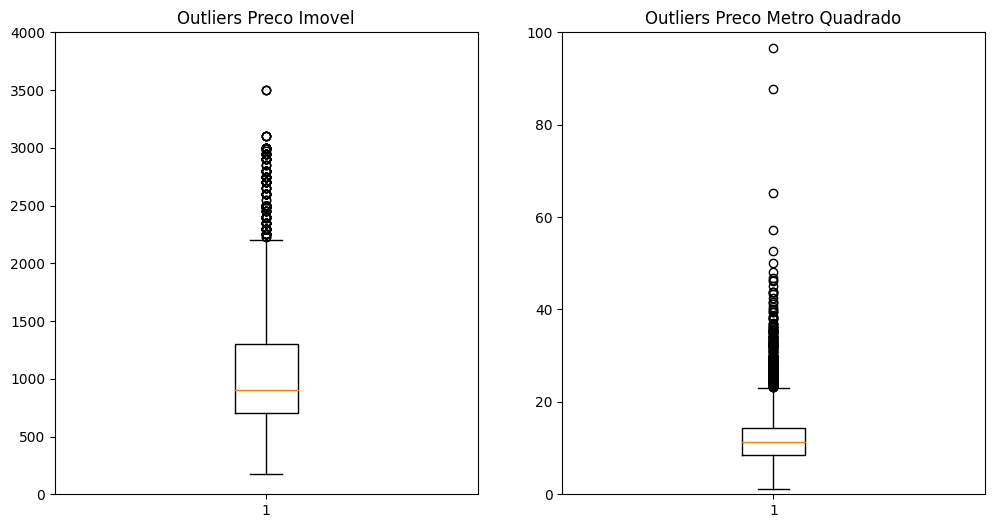

In [9]:
# Para visualização gráfica dos outliers

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.boxplot(df_final['Preco_do_Imovel'])
plt.title('Outliers Preco Imovel')
plt.ylim([0, 4000]) 

plt.subplot(1,2,2)
plt.boxplot(df_final['Preco_por_metro_quadrado'])
plt.title('Outliers Preco Metro Quadrado')
plt.ylim([0, 100]) 
plt.show()

In [10]:
# Concatenando os DataFrames de outliers, para aferir quantos registro serão excluidos da base
todos_outliers = pd.concat([Preco_do_Imovel_outliers, Preco_por_metro_quadrado_outliers])

# Removendo duplicatas
todos_outliers = todos_outliers.drop_duplicates()

# Contando o número total de outliers
num_total_outliers = todos_outliers.shape[0]
num_total_records = df_final.shape[0]

# Calculando a porcentagem de outliers
percent_outliers = (num_total_outliers / num_total_records) * 100
print('Preco_do_Imovel_outliers: ' + str(Preco_do_Imovel_outliers.shape[0]))
print('Preco_por_metro_quadrado_outliers: ' + str(Preco_por_metro_quadrado_outliers.shape[0]))
print(f"Total de outliers: {num_total_outliers}")
print(f"Total Registros da base: {num_total_records}")
print(f"Percentual de outliers: {percent_outliers}%")
                         

Preco_do_Imovel_outliers: 268
Preco_por_metro_quadrado_outliers: 296
Total de outliers: 525
Total Registros da base: 7278
Percentual de outliers: 7.213520197856554%


In [11]:
# Removendo os outliers do DataFrame original
df_final = df_final.drop(todos_outliers.index)

In [12]:
df_final.shape[0]

6753

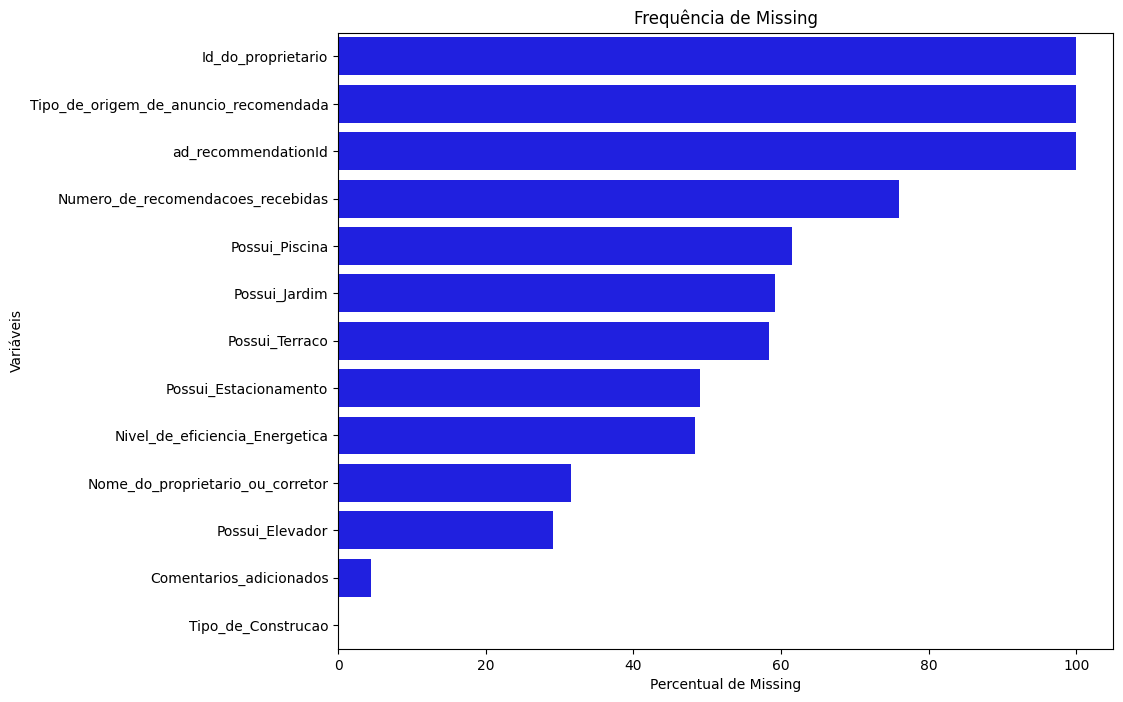

In [13]:
# Analise de Missing


# Suponha que df seja seu DataFrame
missing_data = df_final.isnull().sum().sort_values(ascending=False)

missing_data_percent = (missing_data / len(df_final)) * 100

# Filtrando apenas as variáveis que têm dados ausentes
missing_data_percent = missing_data_percent[missing_data_percent > 0]

plt.figure(figsize=(10,8))
sns.barplot(x=missing_data_percent.values, y=missing_data_percent.index, color='blue')
plt.title('Frequência de Missing')
plt.xlabel('Percentual de Missing')
plt.ylabel('Variáveis')
plt.show()


In [14]:
# filtrando a série
filtered = missing_data_percent[missing_data_percent > 20]

# obtendo os índices como uma lista
columns_to_drop = filtered.index.tolist()

#remove a coluna 'Possui Elevador'
columns_to_drop.remove('Possui_Elevador')

print(columns_to_drop)

['Id_do_proprietario', 'Tipo_de_origem_de_anuncio_recomendada', 'ad_recommendationId', 'Numero_de_recomendacoes_recebidas', 'Possui_Piscina', 'Possui_Jardim', 'Possui_Terraco', 'Possui_Estacionamento', 'Nivel_de_eficiencia_Energetica', 'Nome_do_proprietario_ou_corretor']


In [16]:
# Exclui as colunas do dataframe
df_final = df_final.drop(columns=columns_to_drop)


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(df, column, show_percentage=False):
    """
    Função para plotar o gráfico de contagem de uma variável categórica.

    Args:
    df (pandas.DataFrame): DataFrame contendo os dados.
    column (str): Nome da coluna categórica a ser plotada.
    show_percentage (bool): Indica se o percentual deve ser mostrado acima das barras.

    Returns:
    None
    """
    # criação de uma figura com um subplot
    fig, ax = plt.subplots(figsize=(10, 5))

    # criação do gráfico de contagem usando seaborn
    sns.countplot(x=column, data=df, ax=ax)

    if show_percentage:
        # cálculo dos percentuais
        total = len(df[column])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    # rotação dos rótulos do eixo x para melhor legibilidade
    for label in ax.get_xticklabels():
        label.set_rotation(45)

    # ajuste automático do layout do subplot
    plt.tight_layout()

    # exibir a figura com o gráfico
    plt.show()


In [30]:
### lista de categorias raras
rare_categories_Tipo_de_Imovel = ['T6', 'T7', 'T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19', 'T20']

# substituição das categorias raras por '>T5'
df_final['Tipo_de_Imovel'] = df_final['Tipo_de_Imovel'].replace(rare_categories_Tipo_de_Imovel, '>T5')



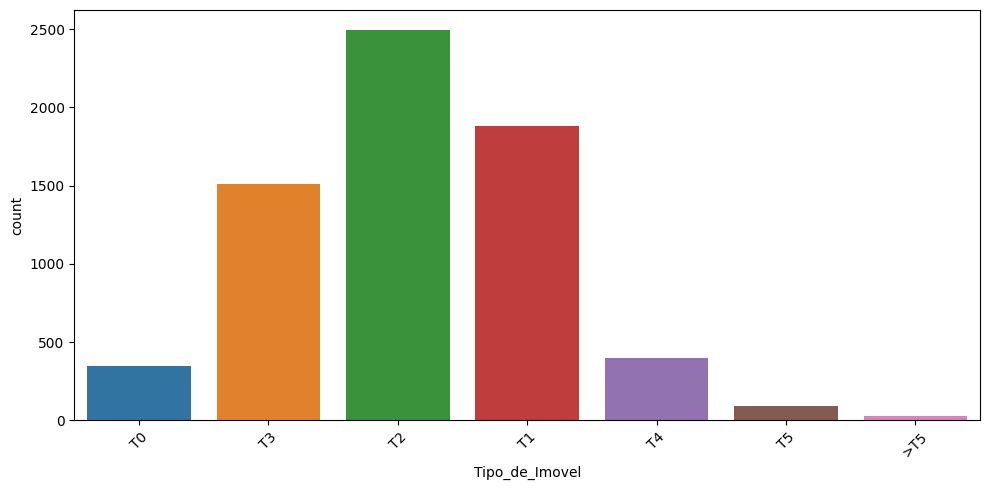

In [31]:
plot_categorical(df_final,'Tipo_de_Imovel')

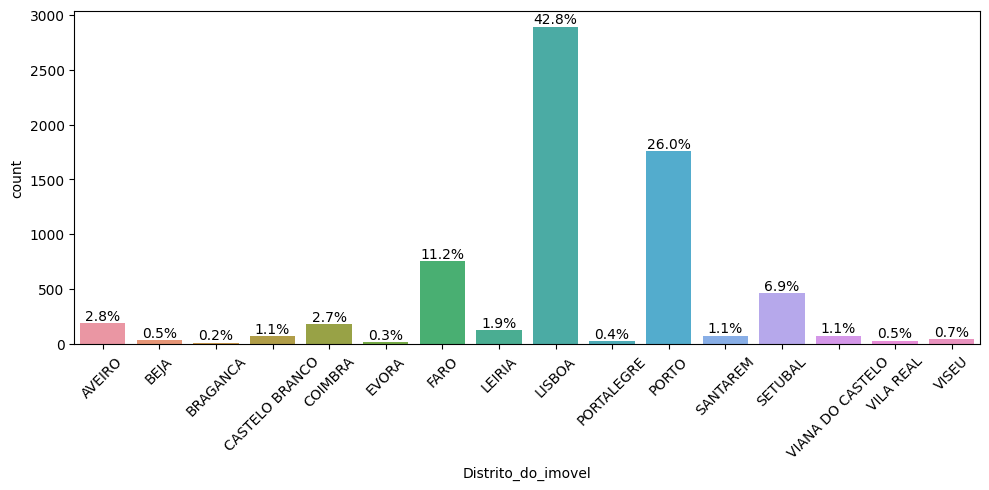

In [35]:
# df_final[['Tipo_de_Imovel','Indicador_de_Elevador','Distrito_do_imovel','Tipo_de_Certificacao_Energetica',]].head(10)

plot_categorical(df_final,'Distrito_do_imovel', True)